#### Ciência de Dados com Python/IA - SENAI-DF - Vespertino - 12/08/2024 - Marcelo Pereira Avelino

#### `Exercício Avaliativo - Risco de Crédito`

#### Risco de Crédito - Crie um notebook utilizando o dataset `credit_risk_dataset`, disponível no website [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).


* Descreva o objetivo do Dataset.

* Renomeie as colunas para Português.

* Explique, no contexto do DataFrame, a utilização da coluna `loan_status`

* Utilize funções básicas do Pandas:
    - `describe()
    - head()
    - tail()
    - shape
    - columns
 
* Realize a análise exploratória (EDA):
    * Qualitativa:
        - Nominais
        - Ordinais

    * Quantitativa:
        - Discretas
        - Contínuas

* Pesquise e explique no contexto do dataset:
    - O que é quartil?
    - O que é percentil (%)?
    - O que é mediana?
    - O que é média?

* Responda:
    - Quais pessoas ganham acima da média? 
    - Quais pessoas têm um risco baixo e ainda assim pedem empréstimos?

* Gere gráficos utilizando o Matplotlib.

* Crie os modelos:
    - Conceitual
    - Lógico
    - Físico

#### `Objetivo do Dataset`

- O objetivo do dataset 'credit_risk_dataset' é fornecer informações que permitam a análise e a previsão do risco de crédito de indivíduos ou entidades. Esse conjunto de dados contém variáveis que representam características financeiras e demográficas dos solicitantes de crédito, como renda, histórico de crédito, situação de emprego, entre outros fatores.

- A análise desse dataset é crucial para identificar padrões e fatores que influenciam a probabilidade de inadimplência, permitindo que instituições financeiras tomem decisões informadas sobre a concessão de crédito, minimizando os riscos associados a empréstimos.

- Em um contexto mais amplo, o dataset pode ser utilizado para treinar modelos de machine learning que predizem a probabilidade de um solicitante de crédito não pagar suas dívidas, ajudando a desenvolver estratégias de mitigação de risco e de aprovação de crédito mais eficazes.

#### `Pré-Requisitos para análise dos dados`

In [ ]:
# 1. Ativar a .venv

# 2. Carregar o arquivo requirements.txt
! pip install -r requirements.txt
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install scipy

In [52]:
# 3. Importando as Biblioteca Necessárias
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import matplotlib.pyplot as plt  # Importa a biblioteca para geração de gráficos
import numpy as np  # Importa a biblioteca para operações numéricas
from scipy import stats  # Importa a biblioteca para funções estatísticas

### `Apresentando e carregando os Dados`

In [60]:
# Definindo o caminho do arquivo CSV na variável 'url'
url = "dataset/credit_risk_dataset.csv"

# Lendo o arquivo CSV e armazenando os dados em um DataFrame chamado df_credito
df_credito = pd.read_csv(url)

# Exibindo as primeiras linhas do DataFrame 'df_credito'
df_credito.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### `Renomeando as Colunas para Português`

In [61]:
# Renomeando as Colunas para Português
novos_nomes = {  # Cria um dicionário com mapeamento das colunas de inglês para português
    'person_age': 'idade_pessoa',  # Renomeia 'person_age' para 'idade_pessoa'
    'person_income': 'renda_pessoa',  # Renomeia 'person_income' para 'renda_pessoa'
    'person_home_ownership': 'propriedade_residencial',  # Renomeia 'person_home_ownership' para 'propriedade_residencial'
    'person_emp_length': 'tempo_emprego',  # Renomeia 'person_emp_length' para 'tempo_emprego'
    'loan_intent': 'intencao_emprestimo',  # Renomeia 'loan_intent' para 'intencao_emprestimo'
    'loan_amnt': 'valor_emprestimo',  # Renomeia 'loan_amnt' para 'valor_emprestimo'
    'loan_status': 'status_emprestimo',  # Renomeia 'loan_status' para 'status_emprestimo'
    'loan_percent_income': 'percentual_renda_emprestimo',  # Renomeia 'loan_percent_income' para 'percentual_renda_emprestimo'
    'cb_person_default_on_file': 'registro_inadimplencia',  # Renomeia 'cb_person_default_on_file' para 'registro_inadimplencia'
    'cb_person_cred_hist_length': 'tempo_historico_credito'  # Renomeia 'cb_person_cred_hist_length' para 'tempo_historico_credito'
}

# Renomeia as colunas do DataFrame usando o dicionário criado
df_credito.rename(columns=novos_nomes, inplace=True)

# Exibe as primeiras linhas do DataFrame após renomear as colunas
df_credito.head()

# Explicação:
# - O método rename() do pandas é utilizado para renomear as colunas ou os índices de um DataFrame.
# - O argumento columns=novos_nomes indica que queremos renomear as colunas, onde 'novos_nomes' é um dicionário.
# - O dicionário 'novos_nomes' deve conter os nomes atuais das colunas como chaves e os novos nomes como valores.
#   Por exemplo, se o nome original de uma coluna é 'loan_status' e queremos renomeá-la para 'status_do_emprestimo',
#   o dicionário incluiria {'loan_status': 'status_do_emprestimo'}.
# - O argumento inplace=True é utilizado para modificar o DataFrame original diretamente, em vez de criar uma cópia
#   com as colunas renomeadas. Isso significa que as mudanças serão aplicadas ao DataFrame 'df_credito' diretamente.
# - Após a execução deste comando, todas as colunas do DataFrame 'df_credito' que têm um nome correspondente no 
#   dicionário 'novos_nomes' serão renomeadas de acordo com os valores especificados no dicionário.

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,loan_grade,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### `Utilização da coluna loan_status`

- A coluna `loan_status`, renomeada para `status_emprestimo`, é uma variável categórica que reflete o status do pagamento dos empréstimos no dataset. Esta coluna é crucial para a análise de risco de crédito, pois indica se um empréstimo foi pago normalmente ou se houve inadimplência.
- Onde `0` poderia representar que o empréstimo foi pago em dia e `1` poderia indicar que houve atraso ou inadimplência.

In [62]:
# loan_status | Status_emprestimo

# Exibindo os valores únicos presentes na coluna 'status_emprestimo' para entender os possíveis status
print(df_credito['status_emprestimo'].unique())

# Exibindo as primeiras linhas da coluna 'status_emprestimo'
df_credito[['status_emprestimo']].head()

[1 0]


,status_emprestimo
0,1
1,0
2,1
3,1
4,1


#### `Explorando funções básicas da Biblioteca Pandas`

In [63]:
# Exibe as primeiras 5 linhas do DataFrame para uma visão geral dos dados
df_credito.head()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,loan_grade,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [64]:
# Exibe as últimas 5 linhas do DataFrame
df_credito.tail()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,loan_grade,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [65]:
# Exibe a quantidade de linhas e colunas do DataFrame
df_credito.shape  # O método shape retorna uma tupla com o número de linhas e colunas do DataFrame

(32581, 12)

In [66]:
# Exibe o resumo estatístico das colunas numéricas do DataFrame
df_credito.describe()  # O método describe() gera estatísticas descritivas como média, desvio padrão, valores mínimos e máximos

,idade_pessoa,renda_pessoa,tempo_emprego,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,tempo_historico_credito
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [67]:
# Exibe a lista de colunas do DataFrame
df_credito.columns  # O atributo columns retorna o índice das colunas do DataFrame

Index(['idade_pessoa', 'renda_pessoa', 'propriedade_residencial',
       'tempo_emprego', 'intencao_emprestimo', 'loan_grade',
       'valor_emprestimo', 'loan_int_rate', 'status_emprestimo',
       'percentual_renda_emprestimo', 'registro_inadimplencia',
       'tempo_historico_credito'],
      dtype='object')

#### `Análise exploratória (EDA) - Qualitativas`

* A análise exploratória de dados (EDA) qualitativa envolve o exame das características categóricas dos dados. Essas características podem ser divididas em dois tipos principais: nominais e ordinais.

1. Variáveis Nominais
    * Definição: Variáveis nominais são aquelas que representam categorias sem uma ordem intrínseca. Cada categoria é distinta e não existe uma relação de hierarquia entre elas.

    * Exemplo no DataFrame:
        * intencao_emprestimo (loan_intent): Representa a finalidade do empréstimo, como "Educação", "Carro", "Casa", etc. Não há ordem entre essas categorias, ou seja, "Educação" não é superior ou inferior a "Carro".
        * propriedade_residencial (person_home_ownership): Indica o tipo de posse da residência, como "Aluguel", "Própria", "Hipoteca". Novamente, não há uma hierarquia entre essas categorias.

    * Análise:

        * Distribuição de Frequência: Podemos contar a frequência de cada categoria para entender quais são mais comuns.

In [74]:
df_credito['intencao_emprestimo'].value_counts()

intencao_emprestimo
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [75]:
df_credito['propriedade_residencial'].value_counts()

propriedade_residencial
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

1. Variáveis Ordinais
    * Definição: Variáveis ordinais representam categorias que têm uma ordem ou hierarquia natural. As categorias podem ser classificadas, mas as diferenças entre elas não são necessariamente iguais.

    * Exemplo no DataFrame:
        * status_emprestimo (loan_status): Pode ser considerado ordinal se for categorizado de forma que reflita uma progressão de risco, como "Totalmente Pago", "Em Dia", "Atrasado", "Cancelado por Inadimplência".
        * registro_inadimplencia (cb_person_default_on_file): Pode ser representado como "Sim" ou "Não", onde "Sim" indica um maior risco de crédito do que "Não".

    * Análise:

        * Distribuição de Frequência: Assim como nas variáveis nominais, podemos contar a frequência das categorias e visualizar essa distribuição.
        * Comparações: Podemos comparar variáveis ordinais com outras variáveis quantitativas ou qualitativas para entender melhor as relações. Por exemplo, podemos verificar se o status_emprestimo está relacionado ao tempo_historico_credito.

In [76]:
# Analisando variáveis nominais
print("Distribuição de intencao_emprestimo:")
print(df_credito['intencao_emprestimo'].value_counts())

Distribuição de intencao_emprestimo:
intencao_emprestimo
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


In [77]:
print("\nDistribuição de propriedade_residencial:")
print(df_credito['propriedade_residencial'].value_counts())


Distribuição de propriedade_residencial:
propriedade_residencial
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


In [78]:
# Analisando variáveis ordinais
print("\nDistribuição de status_emprestimo:")
print(df_credito['status_emprestimo'].value_counts())


Distribuição de status_emprestimo:
status_emprestimo
0    25473
1     7108
Name: count, dtype: int64


In [79]:
print("\nDistribuição de registro_inadimplencia:")
print(df_credito['registro_inadimplencia'].value_counts())


Distribuição de registro_inadimplencia:
registro_inadimplencia
N    26836
Y     5745
Name: count, dtype: int64


In [80]:
# Visualização com gráfico de barras (exemplo para intencao_emprestimo)
import matplotlib.pyplot as plt

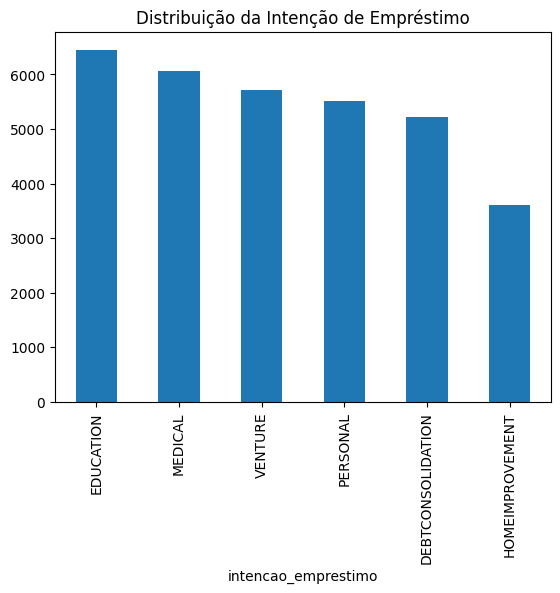

In [81]:
df_credito['intencao_emprestimo'].value_counts().plot(kind='bar', title='Distribuição da Intenção de Empréstimo')
plt.show()

#### `Análise exploratória (EDA) - Quantitativas`

1. Variáveis Discretas

    * Definição: Variáveis discretas são aquelas que assumem valores contáveis e distintos. Elas não podem assumir valores fracionários. No contexto do dataset de risco de crédito, um exemplo de variável discreta pode ser o número de anos de emprego da pessoa (tempo_emprego).

In [82]:
# Exibindo um resumo estatístico da variável 'tempo_emprego' (discreta)
df_credito['tempo_emprego'].describe()

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: tempo_emprego, dtype: float64

<Axes: title={'center': 'Distribuição do Tempo de Emprego'}, xlabel='tempo_emprego'>

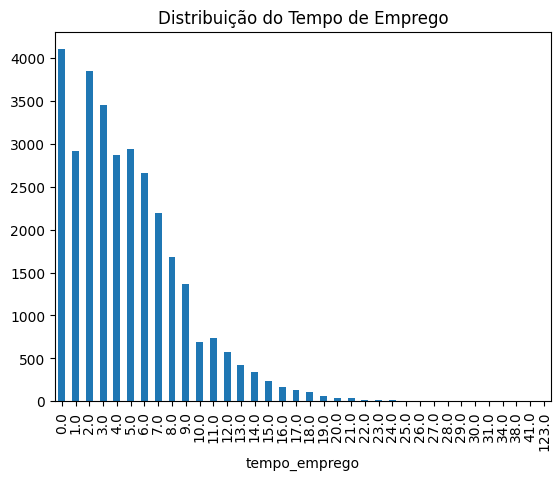

In [83]:
# Exibindo a distribuição da variável 'tempo_emprego'
df_credito['tempo_emprego'].value_counts().sort_index().plot(kind='bar', title='Distribuição do Tempo de Emprego')

2. Variáveis Contínuas

    * Definição: Variáveis contínuas são aquelas que podem assumir qualquer valor em um intervalo contínuo, incluindo valores fracionários. Um exemplo de variável contínua no dataset é a renda da pessoa (renda_pessoa).

In [86]:
# Exibindo um resumo estatístico da variável 'renda_pessoa' (contínua)
df_credito['renda_pessoa'].describe()

# describe(): Gera um resumo estatístico básico da coluna selecionada, incluindo contagem, média, desvio padrão, valores mínimo, máximo, e quartis.

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: renda_pessoa, dtype: float64

<Axes: title={'center': 'Distribuição da Renda das Pessoas'}, ylabel='Frequency'>

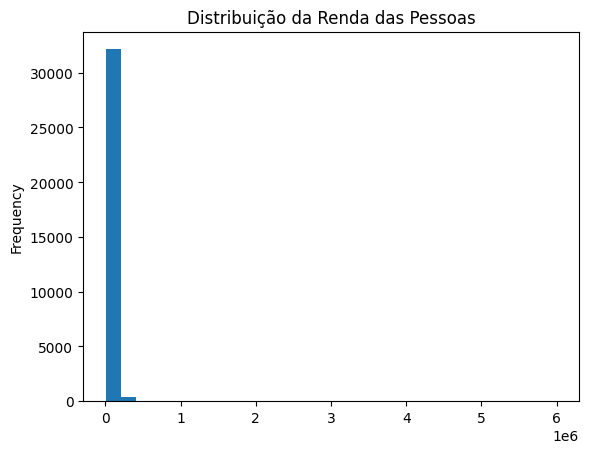

In [87]:
# Exibindo a distribuição da variável 'renda_pessoa'
df_credito['renda_pessoa'].plot(kind='hist', bins=30, title='Distribuição da Renda das Pessoas')

# plot(kind='bar'): Cria um gráfico de barras para visualizar a distribuição de uma variável discreta.
# plot(kind='hist'): Cria um histograma para visualizar a distribuição de uma variável contínua.

#### `Quartil, Percentil (%), Mediana e Média no Contexto do Dataset`

* Quartil divide os dados em 4 partes;
* Percentil divide os dados em 100 partes;
* Mediana é o valor central;
* Média é o valor médio.

`Quartil:`

* Definição: Quartis são valores que dividem um conjunto de dados ordenados em quatro partes iguais, cada uma representando 25% dos dados.
* Contexto no Dataset: No dataset de risco de crédito, os quartis podem ser utilizados para entender a distribuição de variáveis como renda_pessoa. Por exemplo, o primeiro quartil (Q1) representa o ponto abaixo do qual 25% dos valores da renda_pessoa se encontram

In [88]:
# Exemplo: Calculando os quartis da variável 'renda_pessoa'
quartis = df_credito['renda_pessoa'].quantile([0.25, 0.5, 0.75])
quartis

0.25    38500.0
0.50    55000.0
0.75    79200.0
Name: renda_pessoa, dtype: float64

`Percentil (%):`

* Definição: Percentis são valores que dividem um conjunto de dados ordenados em 100 partes iguais. Um percentil indica o valor abaixo do qual uma certa porcentagem dos dados se encontra.
* Contexto no Dataset: No contexto do dataset, percentis podem ser usados para avaliar onde um valor específico da renda_pessoa se encontra em relação aos outros. Por exemplo, o 90º percentil indica que 90% das observações estão abaixo desse valor.

In [89]:
# Exemplo: Calculando o 90º percentil da variável 'renda_pessoa'
percentil_90 = df_credito['renda_pessoa'].quantile(0.9)
percentil_90

np.float64(110004.0)

`Mediana:`

* Definição: A mediana é o valor central que separa a metade superior da metade inferior de um conjunto de dados ordenado.
* Contexto no Dataset: A mediana é uma medida robusta da tendência central e é particularmente útil quando a distribuição da variável, como renda_pessoa, é assimétrica. Ela indica o ponto em que 50% dos valores estão abaixo e 50% estão acima.

In [90]:
# Exemplo: Calculando a mediana da variável 'renda_pessoa'
mediana = df_credito['renda_pessoa'].median()
mediana

np.float64(55000.0)

`Média:`

* Definição: A média é a soma de todos os valores dividida pelo número total de valores. É uma medida comum da tendência central.
* Contexto no Dataset: A média da renda_pessoa no dataset indica o valor médio que uma pessoa ganha. Ela pode ser influenciada por valores extremos (outliers).

In [91]:
# Exemplo: Calculando a média da variável 'renda_pessoa'
media = df_credito['renda_pessoa'].mean()
media

np.float64(66074.84846996715)

`Quais pessoas ganham acima da média?`

Para responder a essa pergunta, vamos primeiro calcular a média da renda das pessoas (renda_pessoa). Em seguida, filtraremos o DataFrame para encontrar as pessoas cuja renda é maior que a média.

In [92]:
# Calculando a média da coluna 'renda_pessoa'
media_renda = df_credito['renda_pessoa'].mean()

# Média da Renda (mean): Calculamos a média da renda (renda_pessoa) para determinar o valor médio que as pessoas ganham no dataset.

In [97]:
# Filtrando as pessoas que ganham acima da média
pessoas_acima_media = df_credito[df_credito['renda_pessoa'] > media_renda]

# Filtragem (>): Utilizamos uma comparação para filtrar as pessoas que têm renda acima da média, resultando em um DataFrame contendo apenas essas pessoas.
# Risco Baixo (status_emprestimo == 0): Assumimos que o status_emprestimo reflete o risco, onde 0 é baixo risco. Filtramos as pessoas com esse status para identificar aquelas com baixo risco.

In [94]:
# Exibindo as pessoas que ganham acima da média
pessoas_acima_media

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,loan_grade,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4
12,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32570,58,72000,RENT,5.0,HOMEIMPROVEMENT,B,4500,NaN,0,0.06,N,23
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


`Quais pessoas têm um risco baixo e ainda assim pedem empréstimos?`

* Para responder a essa pergunta, precisamos identificar a coluna que representa o risco (geralmente baseada no status_emprestimo ou uma coluna semelhante). Em seguida, filtraremos as pessoas que têm um risco baixo e verificaremos se elas pedem empréstimos.

* Assumindo que a coluna status_emprestimo indica o risco (onde 0 é risco baixo e 1 é risco alto):

In [95]:
# Filtrando as pessoas que têm um risco baixo (status_emprestimo == 0)
pessoas_risco_baixo = df_credito[df_credito['status_emprestimo'] == 0]

In [96]:
# Exibindo as pessoas que têm um risco baixo e pedem empréstimos
pessoas_risco_baixo

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,loan_grade,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


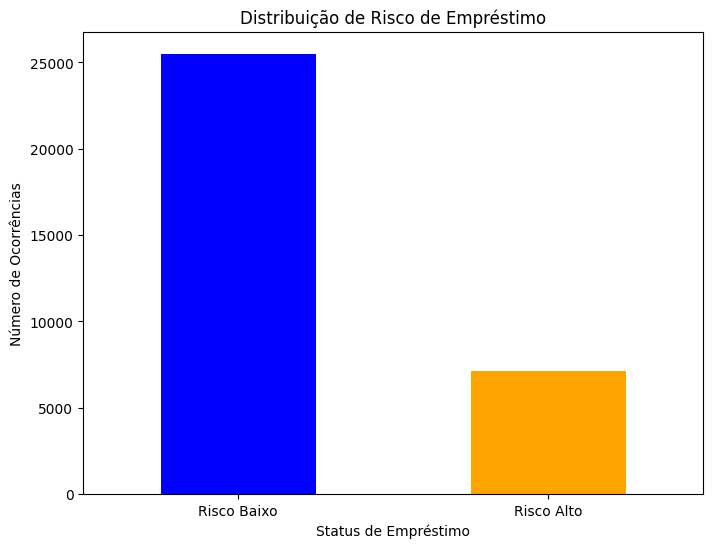

In [98]:

# Gráfico de Barras: Distribuição de Risco de Empréstimo (Loan Status)
import matplotlib.pyplot as plt

# Contando o número de ocorrências de cada status de empréstimo
status_count = df_credito['status_emprestimo'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
status_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição de Risco de Empréstimo')
plt.xlabel('Status de Empréstimo')
plt.ylabel('Número de Ocorrências')
plt.xticks(ticks=[0, 1], labels=['Risco Baixo', 'Risco Alto'], rotation=0)
plt.show()

# Explicação:
# - Este gráfico de barras mostra a distribuição dos status de empréstimo no dataset.
# - Cada barra representa o número de pessoas com risco baixo ou risco alto de inadimplência.


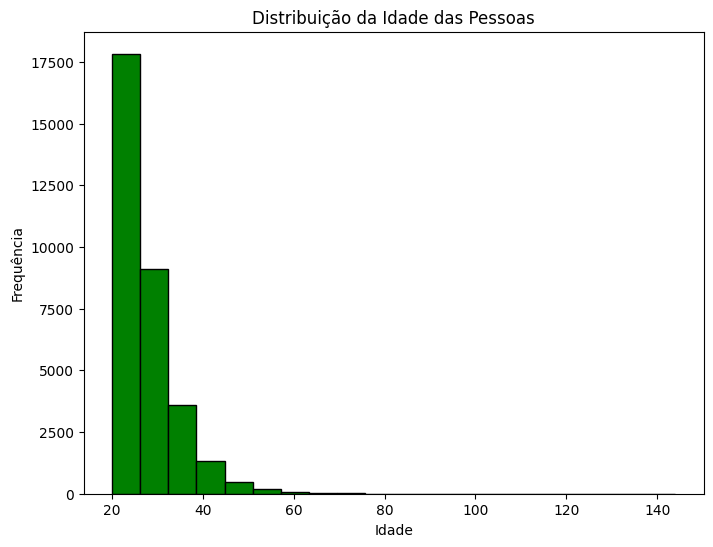

In [99]:
# Histograma: Distribuição da Idade das Pessoas
# Criando um histograma para a idade das pessoas
plt.figure(figsize=(8, 6))
plt.hist(df_credito['idade_pessoa'], bins=20, color='green', edgecolor='black')
plt.title('Distribuição da Idade das Pessoas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Explicação:
# - Este histograma mostra a distribuição das idades das pessoas no dataset.
# - Ele ajuda a entender a faixa etária predominante entre os solicitantes de empréstimo.

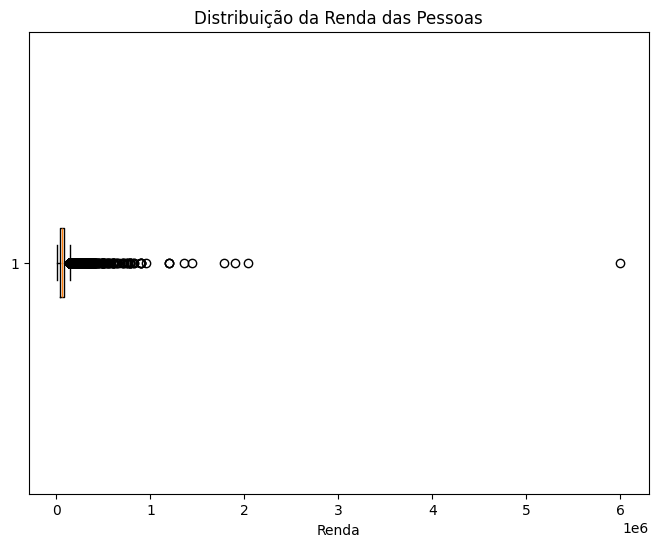

In [100]:
# Boxplot: Distribuição da Renda das Pessoas

# Criando um boxplot para a renda das pessoas
plt.figure(figsize=(8, 6))
plt.boxplot(df_credito['renda_pessoa'], vert=False)
plt.title('Distribuição da Renda das Pessoas')
plt.xlabel('Renda')
plt.show()

# Explicação:
# - Este boxplot visualiza a distribuição da renda das pessoas.
# - Ele mostra a mediana, os quartis e possíveis outliers na renda dos solicitantes de crédito.


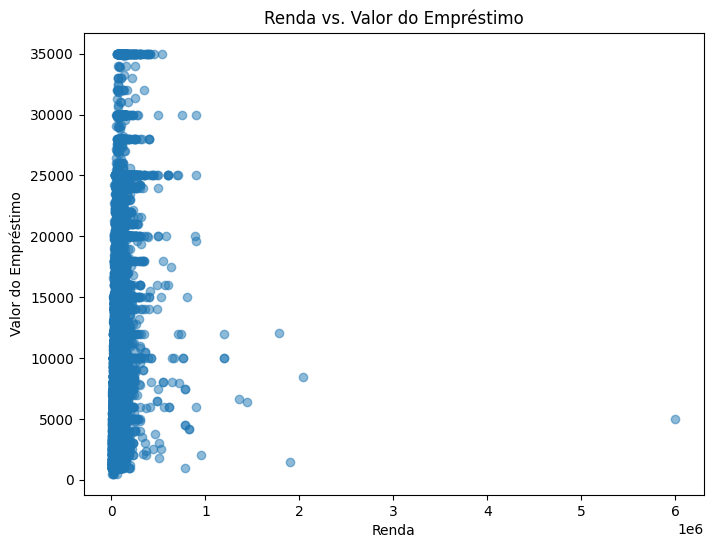

In [101]:
# Gráfico de Dispersão: Renda vs. Valor do Empréstimo

# Criando um gráfico de dispersão para renda vs. valor do empréstimo
plt.figure(figsize=(8, 6))
plt.scatter(df_credito['renda_pessoa'], df_credito['valor_emprestimo'], alpha=0.5)
plt.title('Renda vs. Valor do Empréstimo')
plt.xlabel('Renda')
plt.ylabel('Valor do Empréstimo')
plt.show()

# Explicação:
# - Este gráfico de dispersão mostra a relação entre a renda das pessoas e o valor do empréstimo solicitado.
# - Ele ajuda a visualizar se há uma correlação entre a renda e o valor do empréstimo.

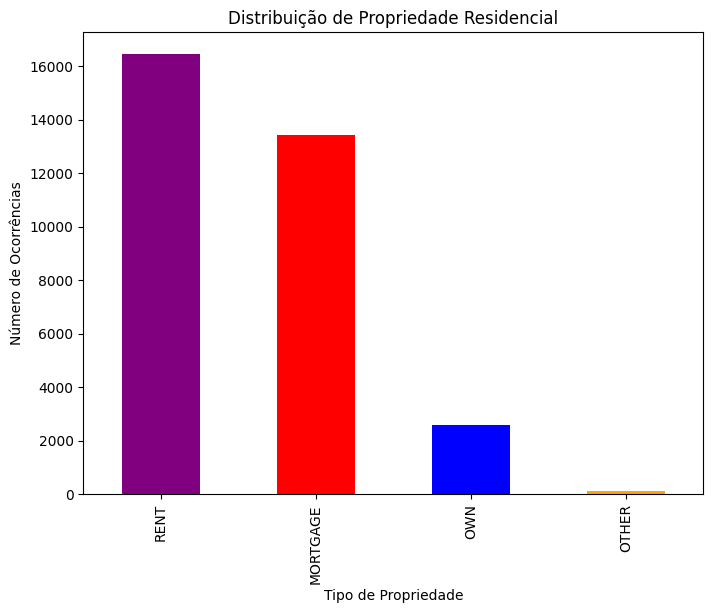

In [102]:
# Gráfico de Barras: Distribuição de Propriedade Residencial

# Contando o número de ocorrências de cada tipo de propriedade residencial
residencia_count = df_credito['propriedade_residencial'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
residencia_count.plot(kind='bar', color=['purple', 'red', 'blue', 'orange'])
plt.title('Distribuição de Propriedade Residencial')
plt.xlabel('Tipo de Propriedade')
plt.ylabel('Número de Ocorrências')
plt.show()

# Explicação:
# - Este gráfico de barras mostra a distribuição dos diferentes tipos de propriedade residencial.
# - Ele ajuda a entender quais tipos de propriedade são mais comuns entre os solicitantes de crédito.

* Crie os modelos:
    - Conceitual
    - Lógico
    - Físico